<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('...') 

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


Дан датафрейм, содержащий 5000 записей, 4 столбца (Пол, Возраст, Зарплата, Члены семьи - признаки, Страховые выплаты - таргет)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пустых ячеек нет, 3 стобца типа int64, 2 типа float64

In [5]:
for column in df.columns:
    print('Столбец:', column)
    print('Значения:', df[column].unique())
    print('Количество:', df[column].nunique())
    print()

Столбец: Пол
Значения: [1 0]
Количество: 2

Столбец: Возраст
Значения: [41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Количество: 46

Столбец: Зарплата
Значения: [49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 3

In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Уникальные значения адекватные, выбросов нет. 

Пол имеет два значения (0, 1). Какое число соответствует какому полу не определено. Можно преобразовать к типу int8.

Возраст измеряется в годах, распределен между 18 и 65 годами. Можно преобразовать к типу int8.

Зарплата измеряется предположтельно в рублях, от 5300 до 79000. Возможно, что у клиента в зарплате присутствуют копейки, оставлю тип float64.

Члены семьи - это количество членов семьи у клиента, от 0 до 6. Можно преобразовать к типу int8. 

Страховые выплаты - количество страховых выплат за 5 лет, от 0 до 5. Можно преобразовать к типу int8.


In [7]:
(df['Возраст'] == df['Возраст'].astype('int8')).all()

True

Проверяю колонку Возраст, можно ли ее преобразовать из float64 в int8, так как числа с плавающей точкой могут преобразоваться к целому числу не верно.

In [8]:
df[['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']] = df[['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']].apply(func=lambda x: x.astype('int8'), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int8   
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int8   
 4   Страховые выплаты  5000 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 58.7 KB


Типы изменены.

In [9]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

Таргет распределен не равномерно, подавляющее большинство клинтов не имело страховых случаев.

In [10]:
cat_columns = ['Пол', 'Члены семьи', 'Страховые выплаты']
num_columns = ['Возраст', 'Зарплата']

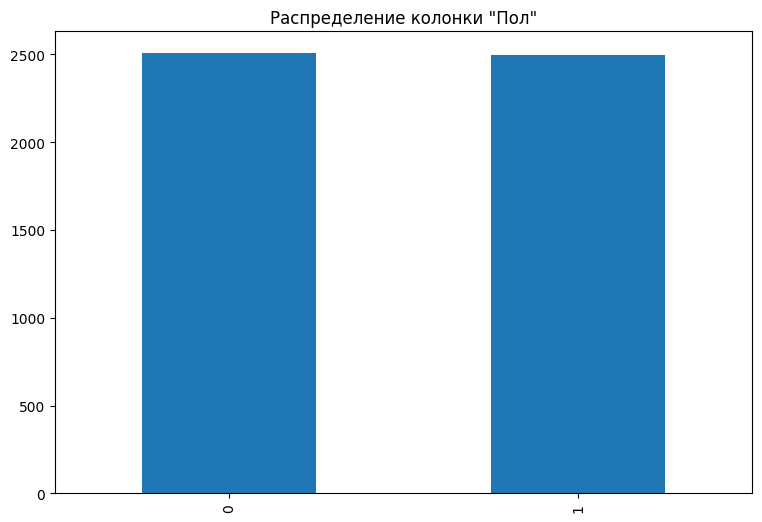

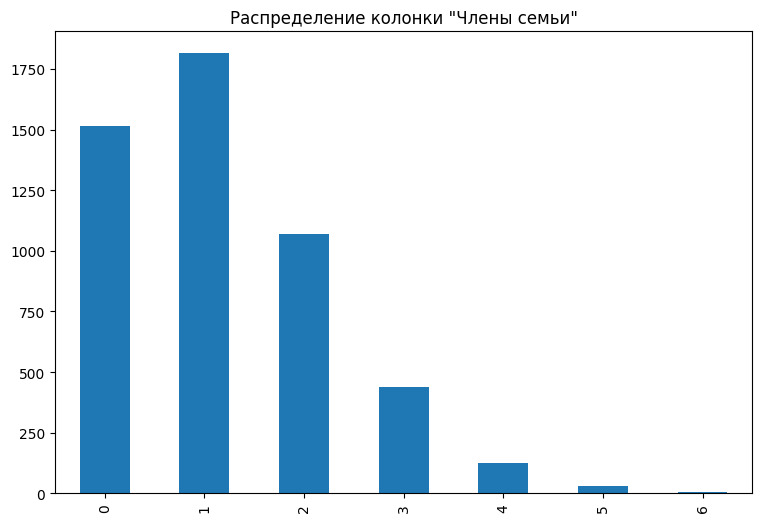

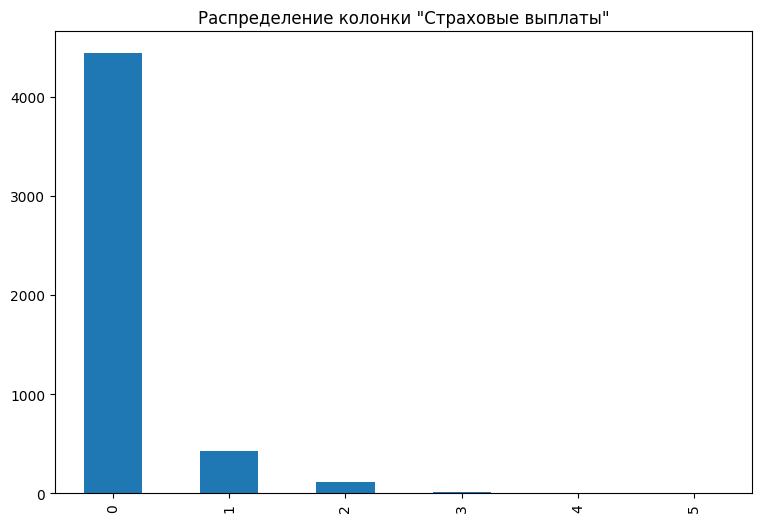

In [11]:
for column in cat_columns:
    df[column].value_counts().sort_index().plot(kind='bar', title=f'Распределение колонки "{column}"', figsize=(9, 6))
    plt.show()

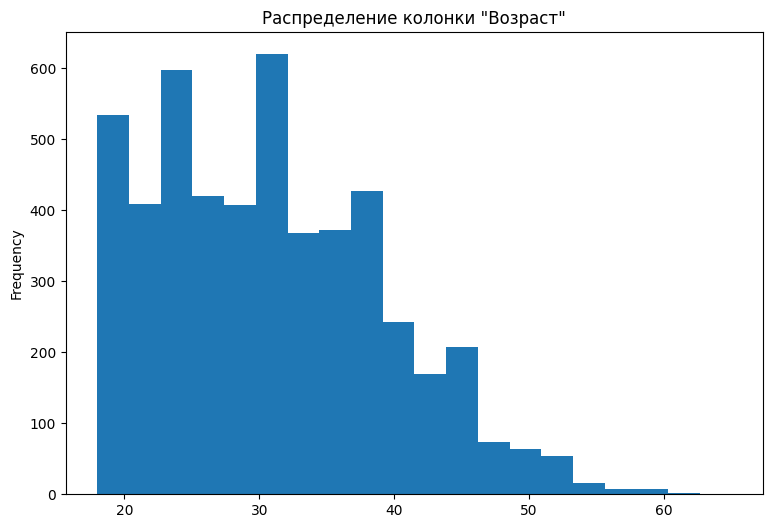

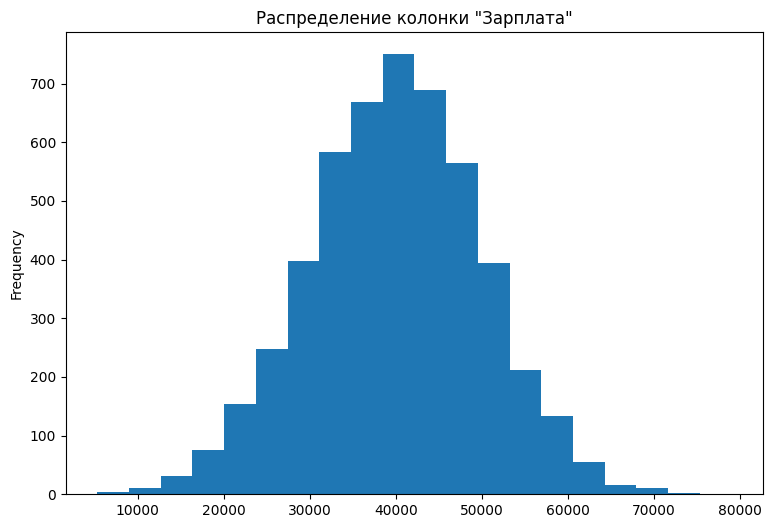

In [12]:
for column in num_columns:
    df[column].plot(kind='hist', bins=20, title=f'Распределение колонки "{column}"', figsize=(9, 6))
    plt.show()

По полу данные распределены равномерно, примерно половина данных одного и другого пола.Распределения признаков количество членов семьи и количество страховых выплат скошены влево, небольшие значения в них встечаются чаще. Распределение возраста тоже скошено влево, в основном клиенты стаховой компании - люди молодого возраста (до 40 лет). Распределение зарплат похоже на нормальное.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

$$
a = Xw = X (X^T X)^{-1} X^T y
$$

заменю $X$ на $X P$, получаю:
$$\tilde a = X P ((X P)^T X P)^{-1} (X P)^T y$$
воспользуюсь следующими свойствами матриц:
$$A(BC) = (AB)C$$
$$(A B)^{-1} = B^{-1} A^{-1}$$
$$(A B)^T = B^T A^T$$
$$A E = E A = A$$
$$A A^{-1} = E$$
$$(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$$

получаю:
$$\tilde a=XP((XP)^TXP)^{-1}(XP)^Ty=XP(P^TX^TXP)^{-1}(XP)^Ty=XP(P^T(X^TX)P)^{-1}(XP)^Ty=XPP^{-1}(X^TX)^{-1}(P^T)^{-1} (XP)^Ty=XE(X^TX)^{-1}(P^T)^{-1} (XP)^Ty=X(X^TX)^{-1}(P^T)^{-1} (XP)^Ty=X(X^TX)^{-1}(P^T)^{-1}P^TX^Ty=X(X^TX)^{-1}EX^Ty=X(X^TX)^{-1}X^Ty=a$$

Вектор решений для матрицы исходных признаков совпал с вектором решений для матрицу признаков умноженную на любую не обратимую матрицу размера n + 1 на n + 1, где n - количество признаков

## Алгоритм преобразования

In [13]:
X = np.column_stack((np.ones(df.shape[0]), df.drop(columns=['Страховые выплаты']).values))
X

array([[1.00e+00, 1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [1.00e+00, 0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Добавляю к матрице признаков нулевой столбец, состоящий из 1

In [14]:
y = df['Страховые выплаты'].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [15]:
y_pred = X @ np.linalg.inv(X.T @ X) @ X.T @ y
y_pred

array([ 0.51172715,  0.68431581,  0.09373365, ..., -0.25697046,
       -0.19099161,  0.04904991])

Вектор предсказаний линейной регрессии, полученный с помощью аналитического решения задачи линейной регресии для не изменненых признаков

In [16]:
def get_invertible_matrix(n):
    while True:
        P = np.random.normal(size=(n, n))
        try:
            np.linalg.inv(P)
            return(P)
        except np.linalg.LinAlgError:
            pass           

Функция выдающая случайную обратимую матрицу n на n

In [17]:
P = get_invertible_matrix(X.shape[1])
P

array([[ 0.98343253, -2.33382072, -0.27810455,  0.34756469, -0.40131485],
       [ 0.36303586,  0.9331885 , -1.9476593 ,  0.5717987 ,  1.49372365],
       [-0.51859639,  1.59644629, -0.63042978, -0.28542067,  0.94985674],
       [-2.10749017,  0.33910513, -0.07880046,  0.1361431 ,  0.28158192],
       [-0.252718  ,  0.34089153,  0.18107896, -1.3766585 ,  0.20464038]])

Получаю случайную обратиму матрицу P

In [18]:
X_ = X @ P
X_

array([[-104551.68097564,   16884.00905771,   -3936.39512824,
           6740.5380486 ,   14006.70442687],
       [ -80107.75105845,   12957.43858039,   -3023.51428032,
           5159.27922596,   10743.60971044],
       [ -44271.34936595,    7165.17087393,   -1673.37023084,
           2851.07539373,    5940.36485883],
       ...,
       [ -71453.81058628,   11525.94083102,   -2683.86014061,
           4607.13680894,    9564.63220192],
       [ -68925.74926103,   11123.48164637,   -2592.32702835,
           4442.38939188,    9230.33197497],
       [ -85577.52772121,   13811.30907641,   -3218.99539996,
           5518.96064797,   11460.11900572]])

Умножаю признаки на обратимую матрицу P

In [19]:
y_pred_ = X_ @ np.linalg.inv(X_.T @ X_) @ X_.T @ y
y_pred_

array([ 0.5117363 ,  0.68431684,  0.09373234, ..., -0.25697303,
       -0.19099052,  0.04905824])

Вектор предсказаний линейной регрессии, полученный с помощью аналитического решения задачи линейной регресии для не изменненых признаков

In [20]:
mean_squared_error(y_pred, y_pred_)

2.8590684950531678e-11

Разницу между результатами с первоначальной матрицей и измененной очень мала

## Проверка алгоритма

In [21]:
def get_encoded_matrix(X):
    return X @ get_invertible_matrix(X.shape[1])

функция выдает закодированную матрицу

In [22]:
X_ = get_encoded_matrix(X)
X_

array([[ 49898.73919733,  22405.97708344,  26841.85470616,
        -15558.52455457, -47465.89004173],
       [ 38241.05882005,  17183.69375637,  20583.42906802,
        -11914.45108012, -36360.45916778],
       [ 21135.82088596,   9501.38811368,  11379.71749836,
         -6584.11865984, -20092.5081041 ],
       ...,
       [ 34097.99395438,  15301.51655835,  18333.92781569,
        -10634.2761196 , -32443.31423982],
       [ 32895.99002159,  14763.0275977 ,  17690.45237229,
        -10256.66364242, -31293.83986324],
       [ 40840.17044774,  18333.18926619,  21963.96976684,
        -12737.2078827 , -38854.55460215]])

In [23]:
model = LinearRegression(fit_intercept=False)

In [24]:
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
r2

0.42494550286668

R2 для первоначальной матрицы признаков

In [25]:
model.fit(X_, y)
y_pred_ = model.predict(X_)
r2_ = r2_score(y, y_pred_)
r2_ 

0.42494550286706756

R2 для закодированной матрицы признаков

In [26]:
abs(r2 - r2_)

3.8757885789664215e-13

Разница между полученными оценками R2 очень мала. Метод кодирования признаков показал свою эффективность.